<a href="https://colab.research.google.com/github/sushant8525/EV_Market_Segmentation/blob/main/EV_Marketsegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [137]:
data1 = pd.read_csv('EV Chargers Sanctioned.csv')
data1.head()

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [138]:
data2 = pd.read_csv('EV Charging Facility available.csv')
data3 = pd.read_csv('EV SELLS.csv')
data4 = pd.read_csv('Fuel.csv')
data5 = pd.read_csv('Vehicle Class.csv')
data6 = pd.read_csv('bhart stages.csv')

In [139]:
data2.head()

,State/UT,No of RO's where EV Charging Facility available
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [140]:
data3.head()

,hoi,State/UT,Total Number of Invoices/Sales
0,1,Jammu Kashmir,1036
1,2,Himachal Pradesh,446
2,3,Punjab,2977
3,4,Chandigarh,154
4,5,Uttarakhand,2288


In [141]:
data4.head()

,Fuel Wise Vehicle Category Data For All State (2022),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,S No,Fuel,Vehicle Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TOTAL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2WIC,2WN,2WT,3WN,3WT,4WIC,HGV,HMV,HPV,LGV,LMV,LPV,MGV,MMV,MPV,OTH,NaN
3,1,CNG ONLY,0,0,0,"2,072","1,63,223",0,"10,334",3,"1,826","73,442",79,900,"10,285",9,"2,273",1,"2,64,447"
4,2,DIESEL,1,36,0,"3,949","60,454",243,"2,18,157","4,860","7,909","3,83,920","11,36,058","52,771","24,491","8,392","10,952","41,305","19,53,498"


In [142]:
data5.head()

,Vehicle Class Wise Fuel Data For All State (2022),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,S No,Vehicle Class ...,Fuel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TOTAL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,NaN
3,1,ADAPTED VEHICLE,0,244,0,0,0,0,0,18,...,0,2,"14,441",204,0,65,2,0,0,"14,976"
4,2,AGRICULTURAL TRACTOR,0,"5,76,226",0,0,0,0,0,3,...,0,98,84,0,0,0,0,0,0,"5,76,411"


In [143]:
data6.head()

,Norms Wise Fuel Data For All State (2022),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,S No,Norms ...,Fuel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TOTAL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,NaN
3,1,BHARAT STAGE I,0,36,0,0,0,0,0,0,...,0,0,90,0,0,0,2,0,0,128
4,2,BHARAT STAGE II,0,289,0,0,0,0,0,0,...,0,1,272,1,0,0,0,0,0,563


In [144]:
data2.shape

(32, 2)

In [145]:
df = pd.merge(data1, data2, how='right')

In [146]:
df.head()

,State/UT,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available
0,Andhra Pradesh,266.0,65
1,Arunachal Pradesh,NaN,4
2,Assam,20.0,19
3,Bihar,37.0,26
4,Chandigarh,70.0,4


In [147]:
df.shape

(32, 3)

In [148]:
df1 = pd.merge(df, data3, how='left')

In [149]:
df1.head()

,State/UT,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available,hoi,Total Number of Invoices/Sales
0,Andhra Pradesh,266.0,65,28,6393.0
1,Arunachal Pradesh,NaN,4,12,1.0
2,Assam,20.0,19,18,827.0
3,Bihar,37.0,26,10,5255.0
4,Chandigarh,70.0,4,4,154.0


In [150]:
df1.shape

(32, 5)

In [151]:
df1.columns

Index(['State/UT', 'No. of EV Chargers Sanctioned',
       'No of RO's where EV Charging Facility available', 'hoi',
       'Total Number of Invoices/Sales'],
      dtype='object')

In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   State/UT                                         32 non-null     object 
 1   No. of EV Chargers Sanctioned                    21 non-null     float64
 2   No of RO's where EV Charging Facility available  32 non-null     int64  
 3   hoi                                              26 non-null     object 
 4   Total Number of Invoices/Sales                   26 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ KB


In [153]:
df1.nunique()

State/UT                                           32
No. of EV Chargers Sanctioned                      19
No of RO's where EV Charging Facility available    26
hoi                                                26
Total Number of Invoices/Sales                     26
dtype: int64

In [154]:
df1 = df1.rename(columns={'State/UT':'State', "No of RO's where EV Charging Facility available":"AvailableCP", 'Total Number of Invoices/Sales':'TotalSales', 'No. of EV Chargers Sanctioned':'SanctionedCP'})

In [155]:
df1.head()

,State,SanctionedCP,AvailableCP,hoi,TotalSales
0,Andhra Pradesh,266.0,65,28,6393.0
1,Arunachal Pradesh,NaN,4,12,1.0
2,Assam,20.0,19,18,827.0
3,Bihar,37.0,26,10,5255.0
4,Chandigarh,70.0,4,4,154.0


In [167]:
df1.head()

,State,SanctionedCP,AvailableCP,TotalSales
0,Andhra Pradesh,266.000000,65,6393.0
1,Arunachal Pradesh,119.571429,4,1.0
2,Assam,20.000000,19,827.0
3,Bihar,37.000000,26,5255.0
4,Chandigarh,70.000000,4,154.0


In [156]:
df1.describe(include='all')

,State,SanctionedCP,AvailableCP,hoi,TotalSales
count,32,21.000000,32.000000,26,26.000000
unique,32,NaN,NaN,26,NaN
top,Andhra Pradesh,NaN,NaN,28,NaN
freq,1,NaN,NaN,1,NaN
mean,NaN,119.571429,96.000000,NaN,6008.692308
std,NaN,99.401495,267.474087,NaN,7953.432144
min,NaN,10.000000,1.000000,NaN,1.000000
25%,NaN,25.000000,4.000000,NaN,769.250000
50%,NaN,72.000000,32.500000,NaN,4013.500000
75%,NaN,207.000000,87.250000,NaN,6313.500000


In [158]:
df1.SanctionedCP = df1.SanctionedCP.fillna(df1.SanctionedCP.mean())
df1.AvailableCP = df1.AvailableCP.fillna(df1.AvailableCP.mean())
df1.TotalSales = df1.TotalSales.fillna(df1.TotalSales.mean())

In [159]:
df1.describe()

,SanctionedCP,AvailableCP,TotalSales
count,32.000000,32.000000,32.000000
mean,119.571429,96.000000,6008.692308
std,79.841202,267.474087,7142.392911
min,10.000000,1.000000,1.000000
25%,47.500000,4.000000,1217.000000
50%,119.571429,32.500000,5053.000000
75%,148.750000,87.250000,6083.019231
max,281.000000,1536.000000,33483.000000


In [160]:
df1.corr()

,SanctionedCP,AvailableCP,TotalSales
SanctionedCP,1.000000,0.101933,0.455424
AvailableCP,0.101933,1.000000,0.094365
TotalSales,0.455424,0.094365,1.000000


In [163]:
df1['State'].value_counts().keys().tolist()

['Andhra Pradesh',
 'Arunachal Pradesh',
 'West Bengal',
 'Uttarakhand',
 'Uttar Pradesh',
 'Tripura',
 'Telangana',
 'Tamil Nadu',
 'Rajasthan',
 'Punjab',
 'Pondicherry',
 'Odisha',
 'Nagaland',
 'Meghalaya',
 'Manipur',
 'Maharastra',
 'Madhya Pradesh',
 'Leh',
 'Kerala',
 'Karnataka',
 'Jammu and Kashmir',
 'Jharkhand',
 'Himachal Pradesh',
 'Haryana',
 'Gujarat',
 'Goa',
 'Delhi',
 'Chhattisgarh',
 'Chandigarh',
 'Bihar',
 'Assam',
 'Grand Total']

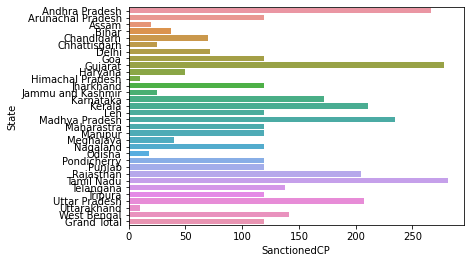

In [180]:
sns.barplot(x='SanctionedCP', y='State', data=df1)